In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2021-04-11T17:00:00,6,Friuli Venezia Giulia,519,75,594,10517,11111,-311,208,...,12.0,4909.0,1547.0,-314.0,12.63,5.35,4.24,13.45,0.00,-2.72
412,2021-04-12T17:00:00,6,Friuli Venezia Giulia,523,81,604,10383,10987,-124,82,...,11.0,1605.0,469.0,-134.0,13.41,5.50,5.11,17.48,8.00,-1.12
413,2021-04-13T17:00:00,6,Friuli Venezia Giulia,493,75,568,9961,10529,-458,371,...,17.0,11191.0,3564.0,-422.0,13.20,5.39,3.32,10.41,-7.41,-4.17
414,2021-04-14T17:00:00,6,Friuli Venezia Giulia,471,72,543,9783,10326,-203,226,...,12.0,7145.0,1290.0,-178.0,13.26,5.26,3.16,17.52,-4.00,-1.93


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 267
Nuovi tamponi: 6184.0
Percentuale nuovi positivi/nuovi tamponi: 4.3 %
Nuovi guariti: 336.0
Nuovi deceduti: 12.0
Variazione positivi ricoverati con sintomi: -26.0
Variazione positivi in terapia intensiva: -7.0
Variazione positivi in isolamento dimiciliare: -48.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,6,Friuli Venezia Giulia,414,61,475,9296,9771,-250,216,...,11.0,5638.0,1887.0,-240.0,12.84,4.86,3.83,11.45,1.67,-2.49
1,2021-02-15T17:00:00,6,Friuli Venezia Giulia,412,63,475,9284,9759,-12,40,...,12.0,1072.0,415.0,-12.0,13.26,4.87,3.73,9.64,3.28,-0.12
2,2021-02-16T17:00:00,6,Friuli Venezia Giulia,396,60,456,9015,9471,-288,260,...,10.0,8082.0,2430.0,-269.0,13.16,4.81,3.22,10.70,-4.76,-2.95
3,2021-02-17T17:00:00,6,Friuli Venezia Giulia,384,59,443,8969,9412,-59,333,...,7.0,9872.0,2807.0,-46.0,13.32,4.71,3.37,11.86,-1.67,-0.62
4,2021-02-18T17:00:00,6,Friuli Venezia Giulia,361,58,419,8991,9410,-2,262,...,11.0,7885.0,2518.0,22.0,13.84,4.45,3.32,10.41,-1.69,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-11T17:00:00,6,Friuli Venezia Giulia,519,75,594,10517,11111,-311,208,...,12.0,4909.0,1547.0,-314.0,12.63,5.35,4.24,13.45,0.00,-2.72
57,2021-04-12T17:00:00,6,Friuli Venezia Giulia,523,81,604,10383,10987,-124,82,...,11.0,1605.0,469.0,-134.0,13.41,5.50,5.11,17.48,8.00,-1.12
58,2021-04-13T17:00:00,6,Friuli Venezia Giulia,493,75,568,9961,10529,-458,371,...,17.0,11191.0,3564.0,-422.0,13.20,5.39,3.32,10.41,-7.41,-4.17
59,2021-04-14T17:00:00,6,Friuli Venezia Giulia,471,72,543,9783,10326,-203,226,...,12.0,7145.0,1290.0,-178.0,13.26,5.26,3.16,17.52,-4.00,-1.93


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

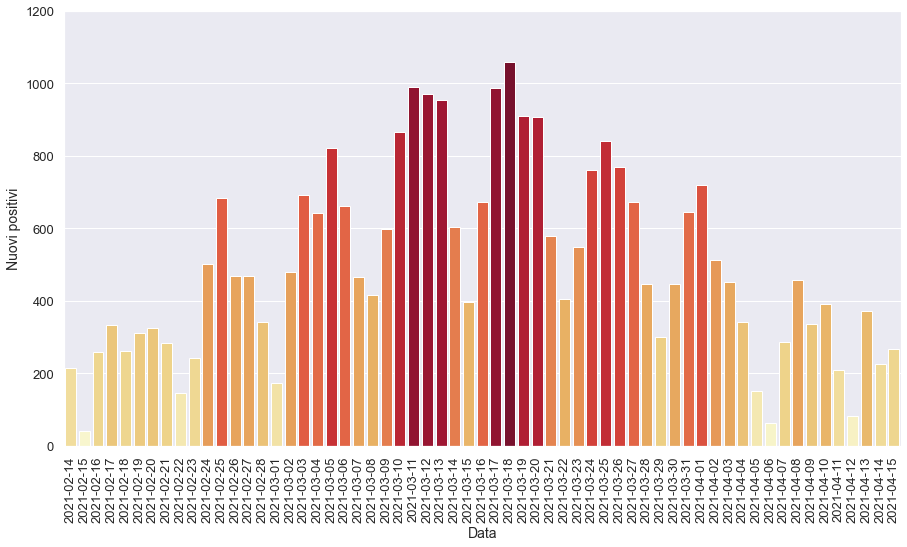

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

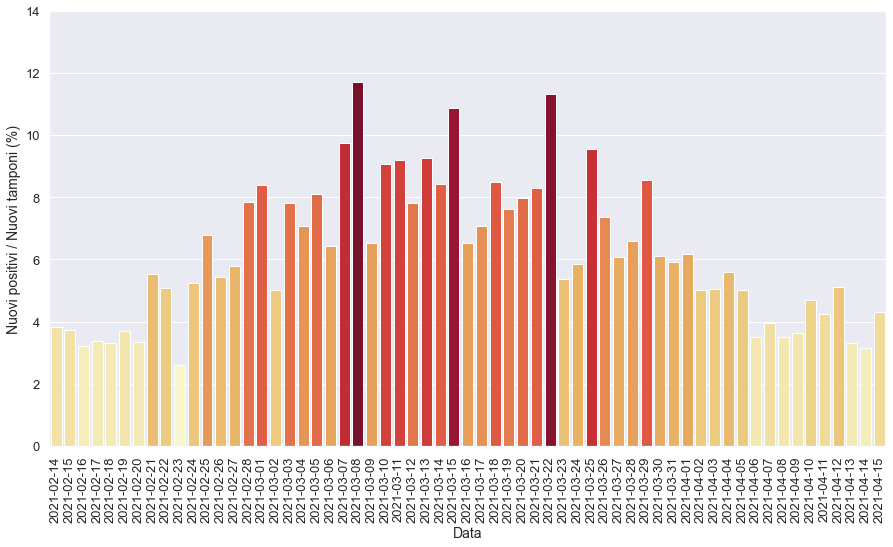

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

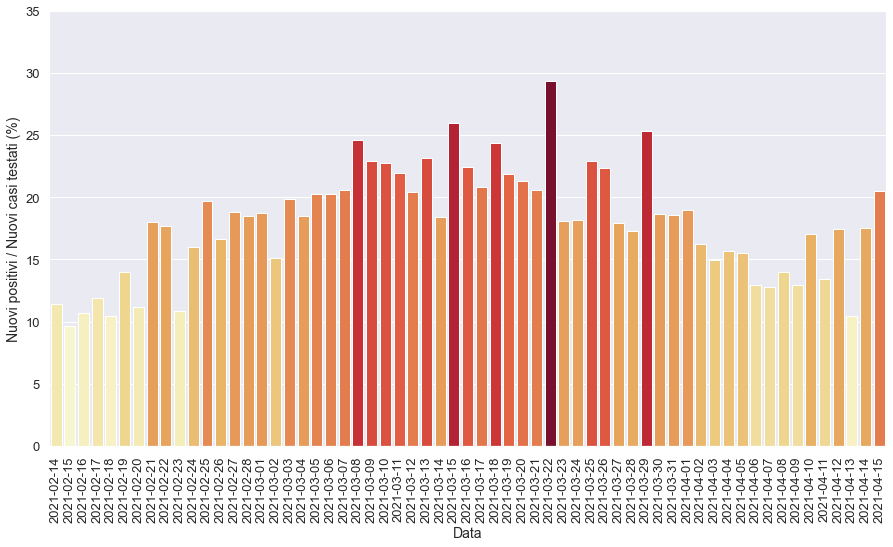

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

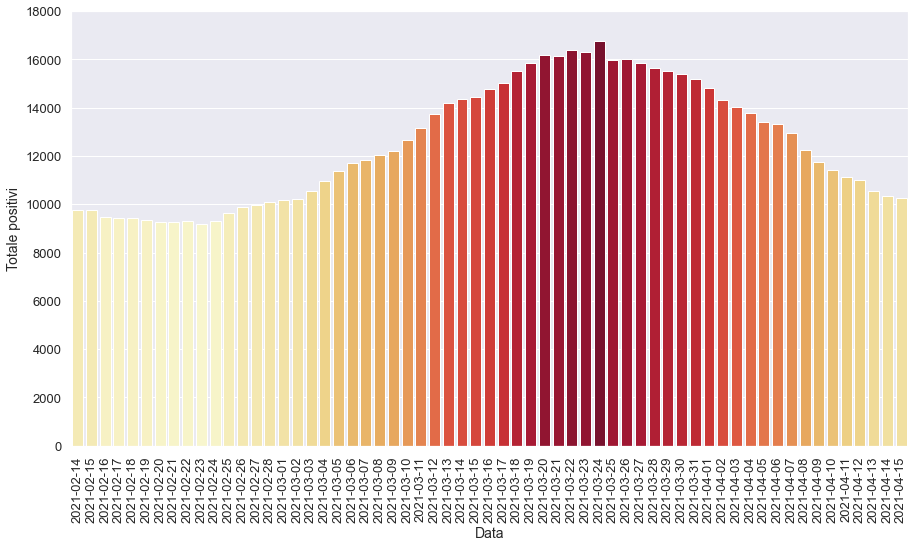

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

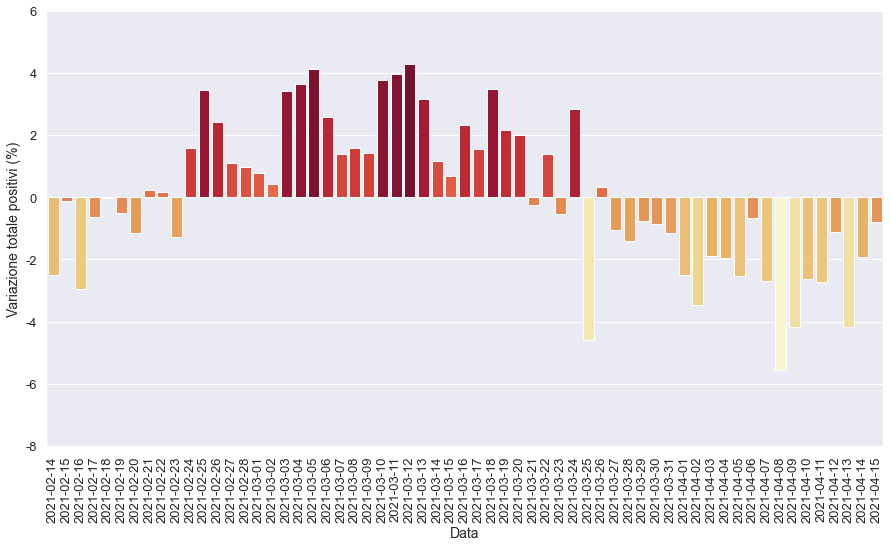

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

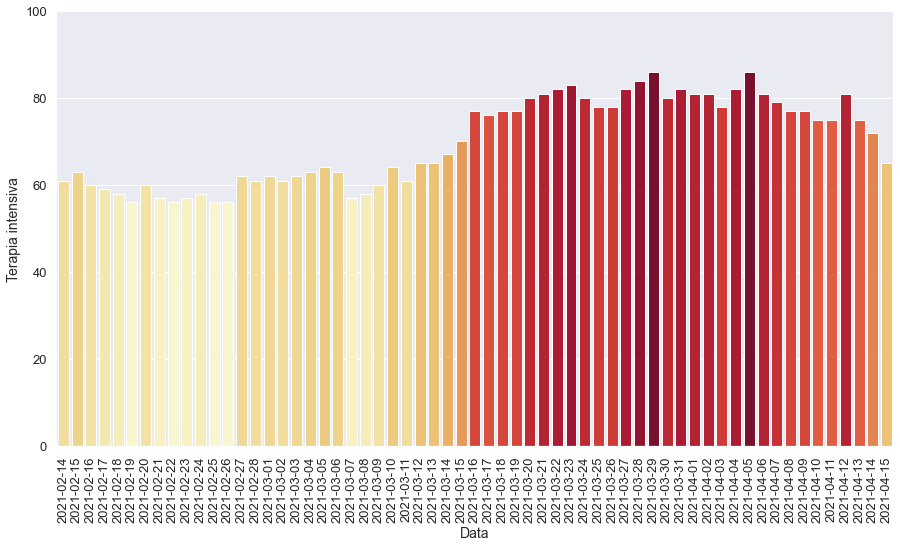

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

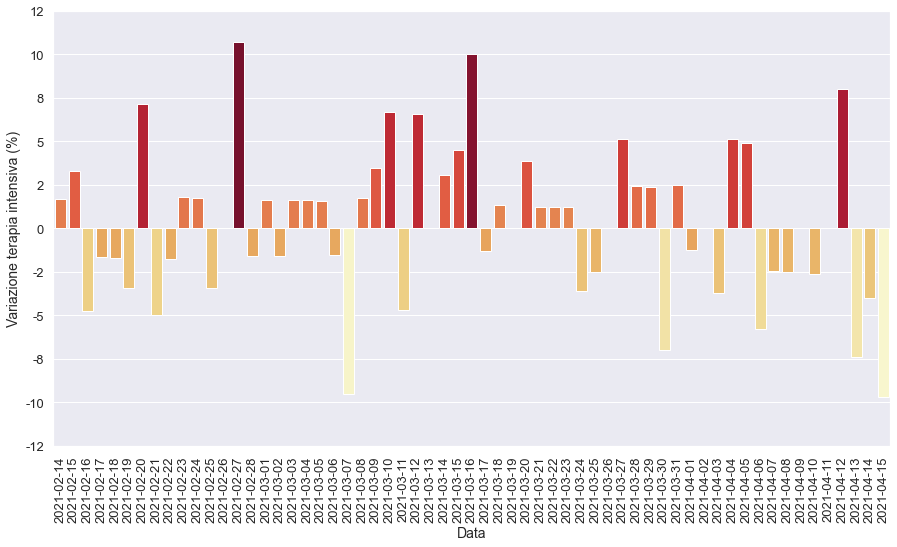

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

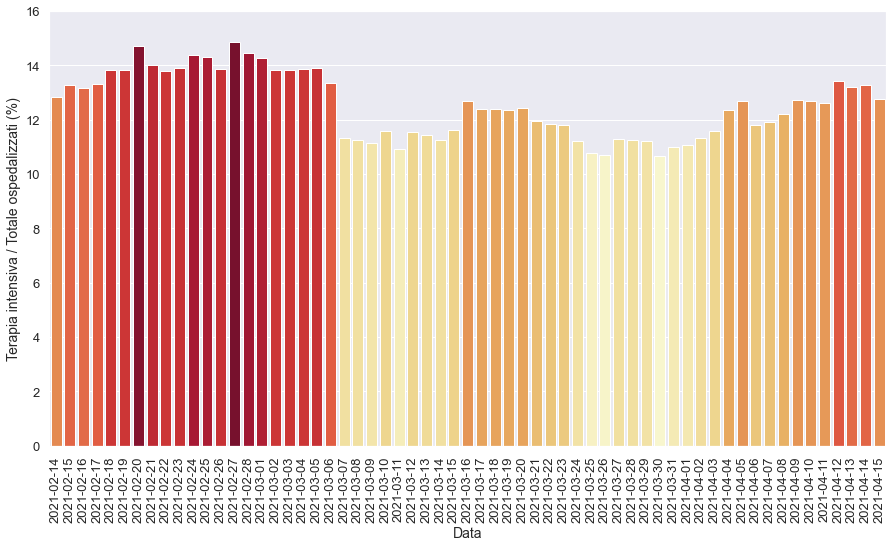

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

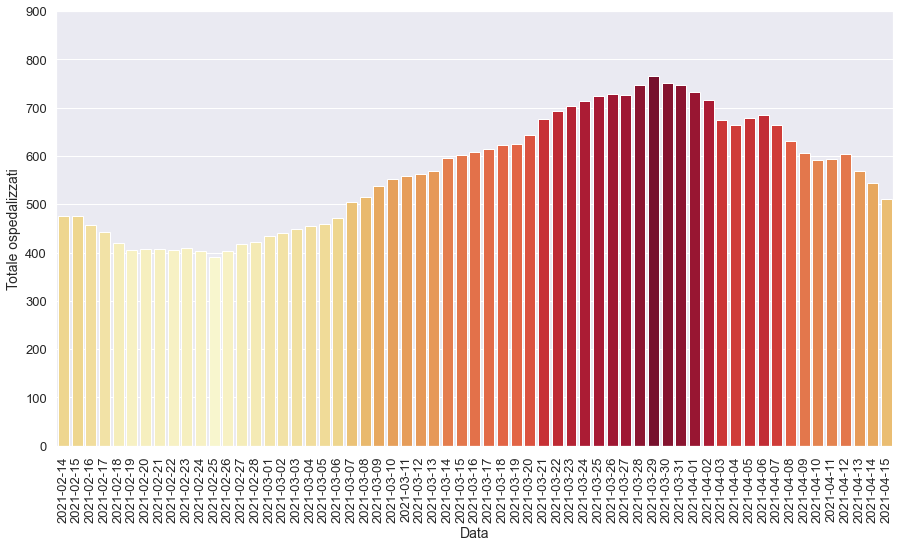

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

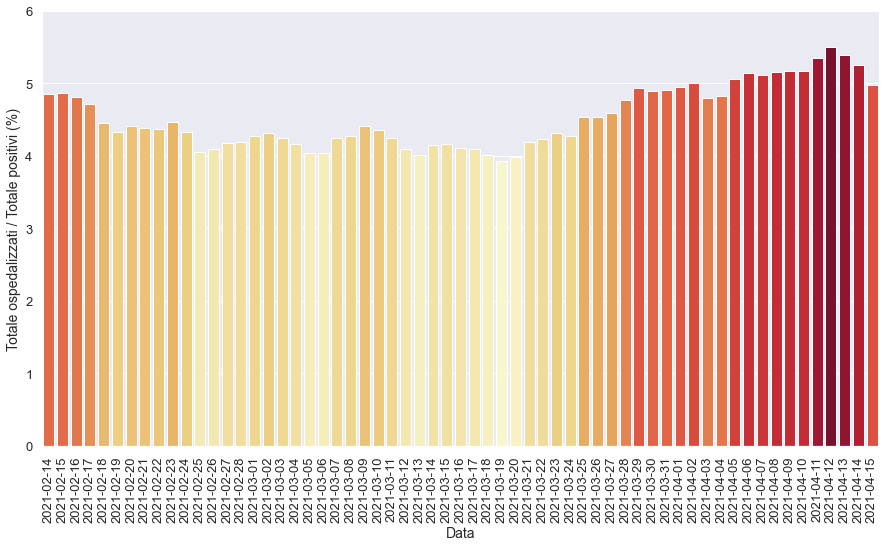

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

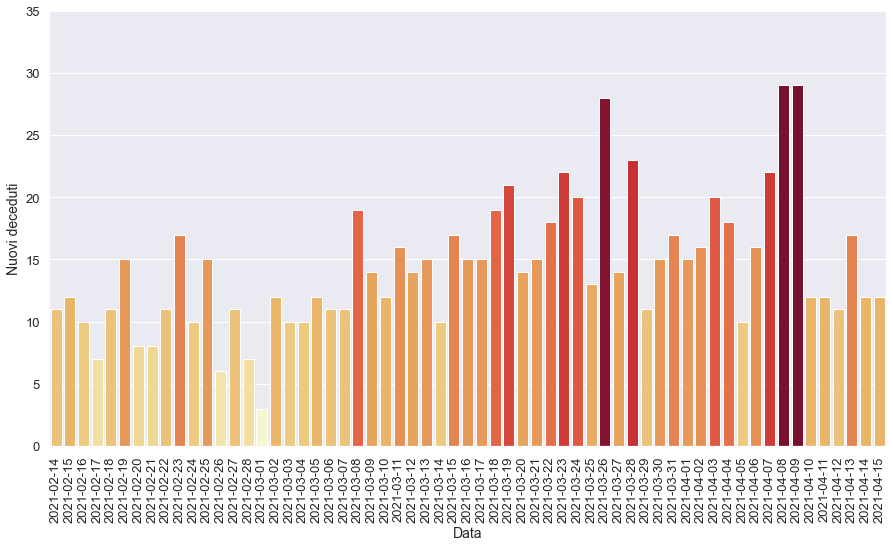

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

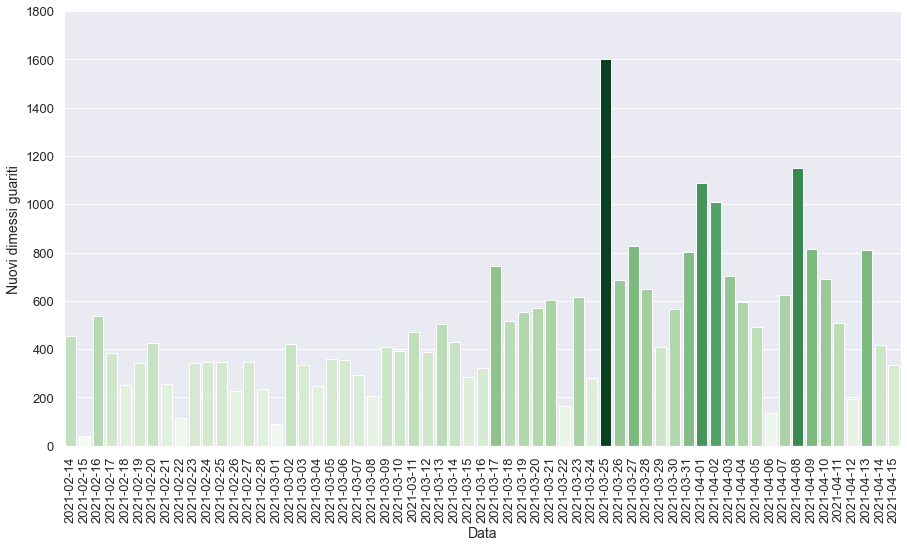

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-16T17:00:00,6,Friuli Venezia Giulia,530,77,607,14167,14774,336,672,...,15.0,10272.0,2998.0,331.0,12.69,4.11,6.54,22.41,10.00,2.33
1,2021-03-17T17:00:00,6,Friuli Venezia Giulia,538,76,614,14388,15002,228,986,...,15.0,13904.0,4732.0,221.0,12.38,4.09,7.09,20.84,-1.30,1.54
2,2021-03-18T17:00:00,6,Friuli Venezia Giulia,545,77,622,14904,15526,524,1058,...,19.0,12440.0,4347.0,516.0,12.38,4.01,8.50,24.34,1.32,3.49
3,2021-03-19T17:00:00,6,Friuli Venezia Giulia,547,77,624,15239,15863,337,910,...,21.0,11919.0,4158.0,335.0,12.34,3.93,7.63,21.89,0.00,2.17
4,2021-03-20T17:00:00,6,Friuli Venezia Giulia,564,80,644,15540,16184,321,906,...,14.0,11337.0,4257.0,301.0,12.42,3.98,7.99,21.28,3.90,2.02
5,2021-03-21T17:00:00,6,Friuli Venezia Giulia,596,81,677,15468,16145,-39,578,...,15.0,6962.0,2812.0,-72.0,11.96,4.19,8.30,20.55,1.25,-0.24
6,2021-03-22T17:00:00,6,Friuli Venezia Giulia,611,82,693,15676,16369,224,405,...,18.0,3576.0,1380.0,208.0,11.83,4.23,11.33,29.35,1.23,1.39
7,2021-03-23T17:00:00,6,Friuli Venezia Giulia,620,83,703,15577,16280,-89,548,...,22.0,10178.0,3031.0,-99.0,11.81,4.32,5.38,18.08,1.22,-0.54
8,2021-03-24T17:00:00,6,Friuli Venezia Giulia,634,80,714,16026,16740,460,762,...,20.0,12996.0,4185.0,449.0,11.20,4.27,5.86,18.21,-3.61,2.83
9,2021-03-25T17:00:00,6,Friuli Venezia Giulia,645,78,723,15245,15968,-772,842,...,13.0,8826.0,3676.0,-781.0,10.79,4.53,9.54,22.91,-2.50,-4.61


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

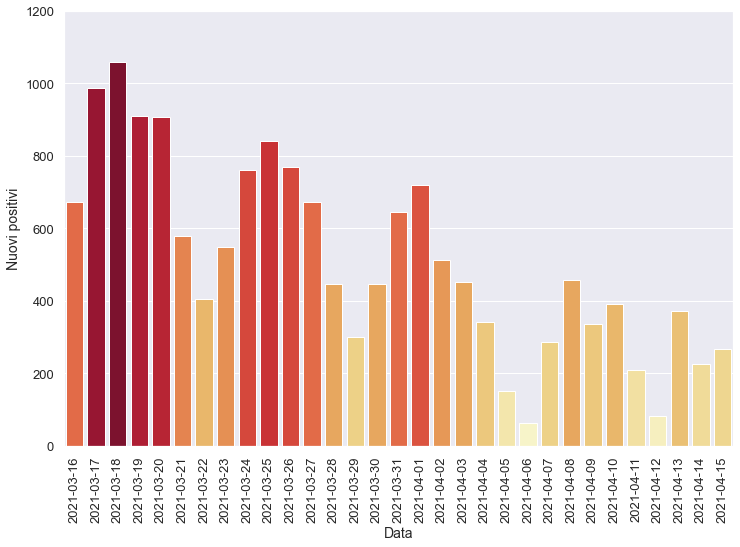

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

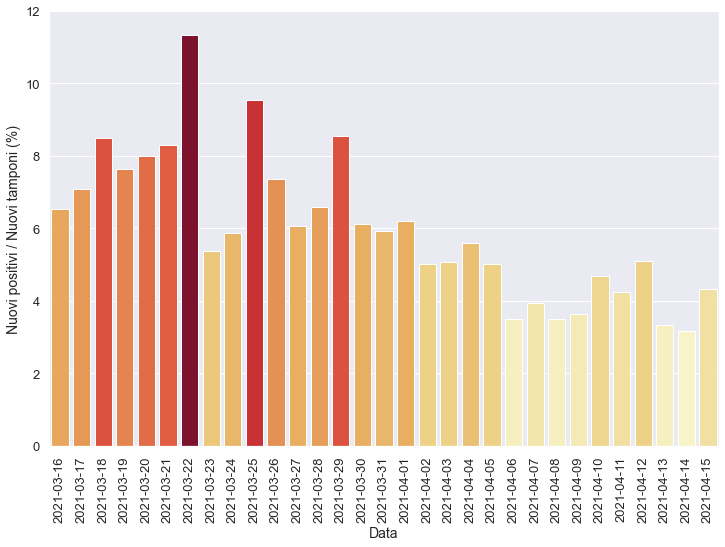

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

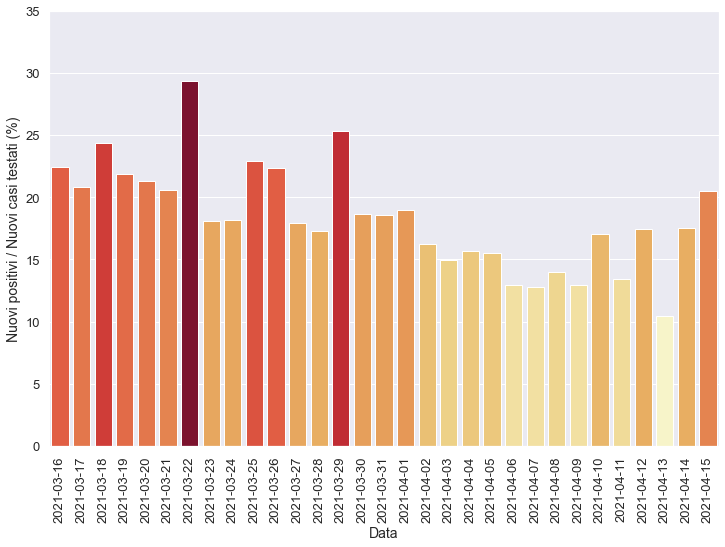

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

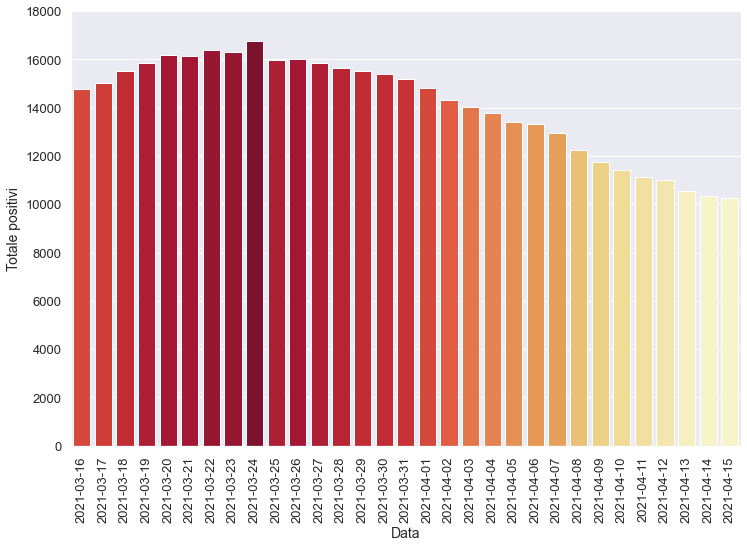

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

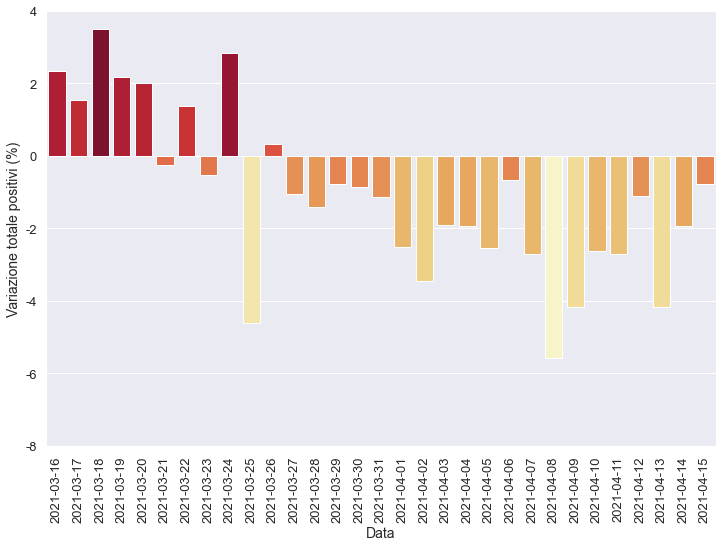

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

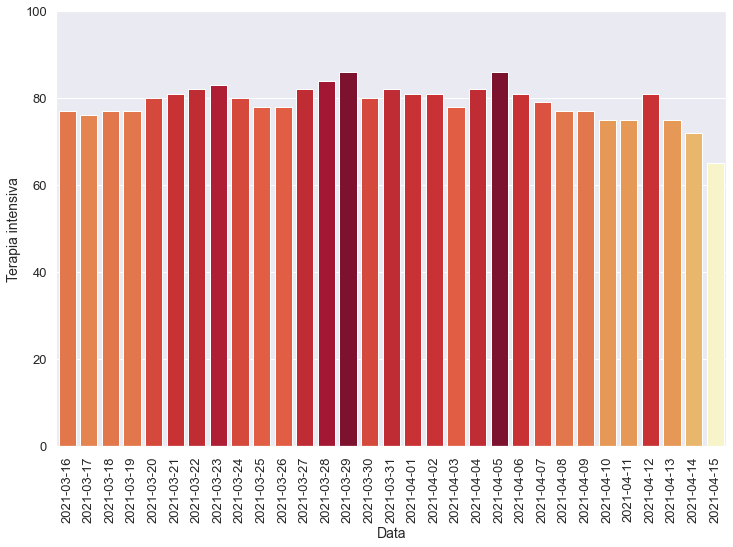

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

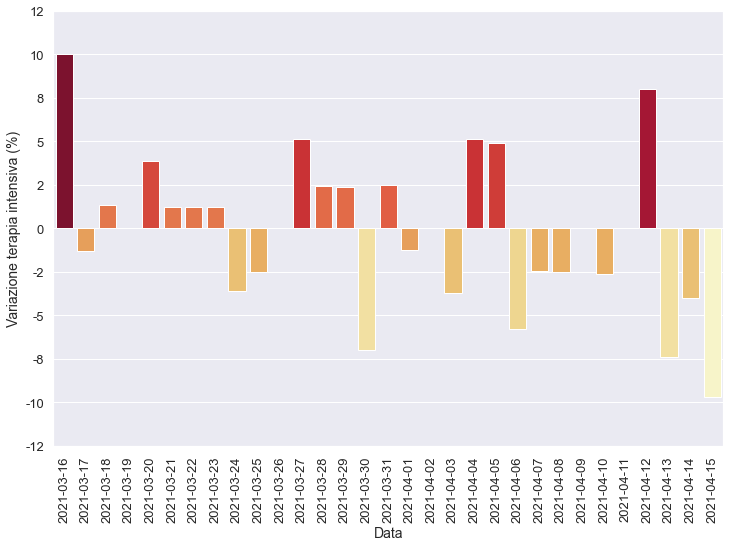

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

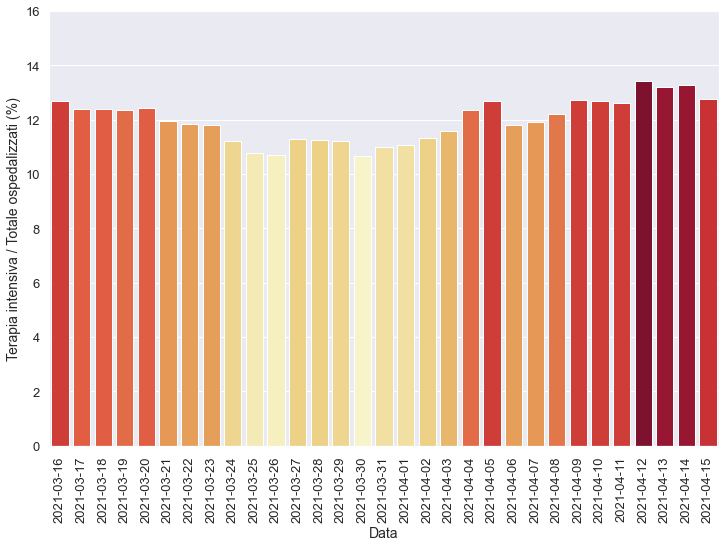

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

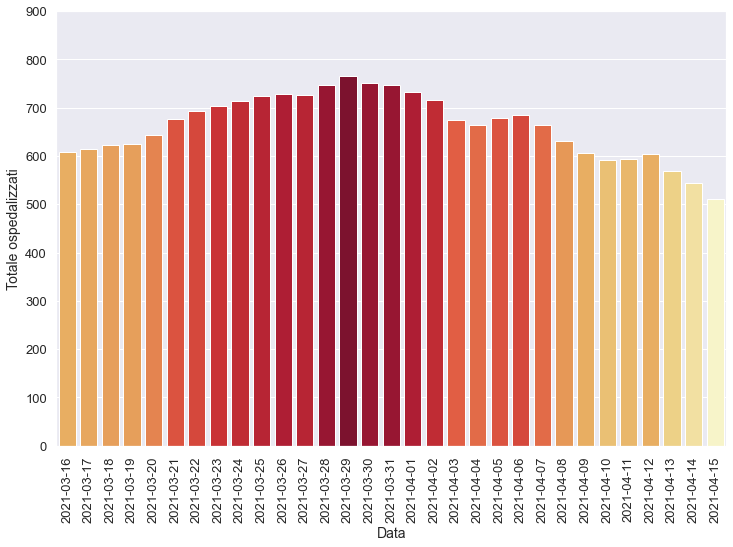

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

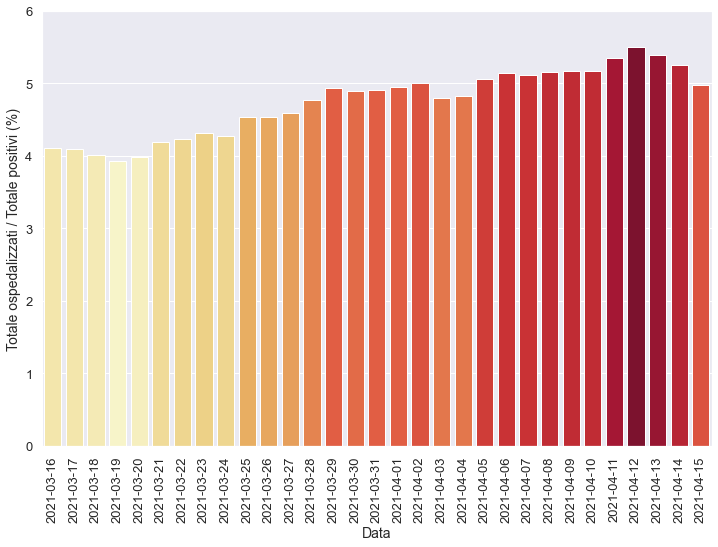

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

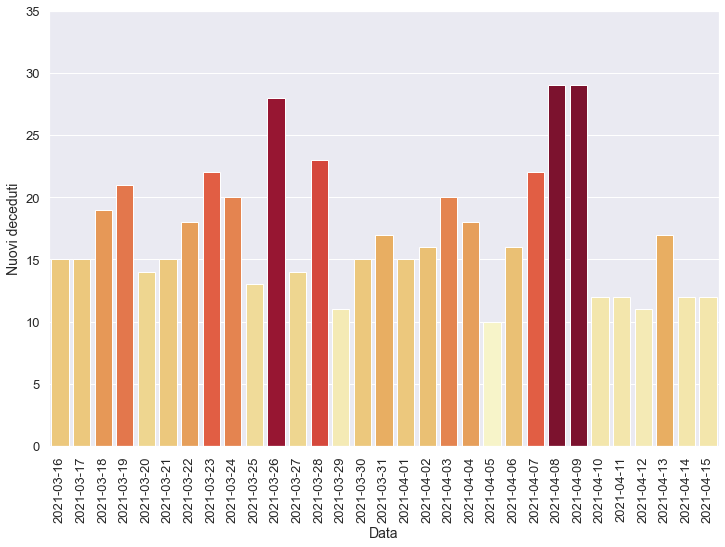

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

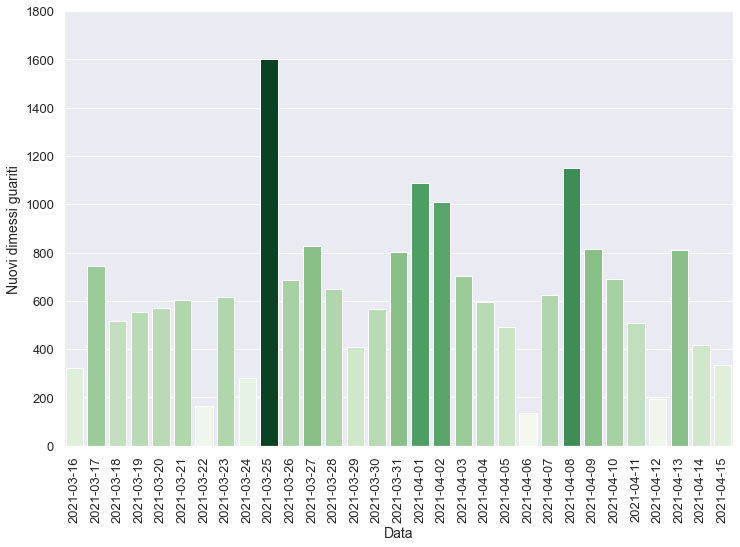

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-08T17:00:00,6,Friuli Venezia Giulia,554,77,631,11609,12240,-722,457,...,29.0,13064.0,3274.0,-690.0,12.20,5.16,3.50,13.96,-2.53,-5.57
1,2021-04-09T17:00:00,6,Friuli Venezia Giulia,529,77,606,11125,11731,-509,336,...,29.0,9224.0,2601.0,-484.0,12.71,5.17,3.64,12.92,0.00,-4.16
2,2021-04-10T17:00:00,6,Friuli Venezia Giulia,516,75,591,10831,11422,-309,392,...,12.0,8357.0,2305.0,-294.0,12.69,5.17,4.69,17.01,-2.60,-2.63
3,2021-04-11T17:00:00,6,Friuli Venezia Giulia,519,75,594,10517,11111,-311,208,...,12.0,4909.0,1547.0,-314.0,12.63,5.35,4.24,13.45,0.00,-2.72
4,2021-04-12T17:00:00,6,Friuli Venezia Giulia,523,81,604,10383,10987,-124,82,...,11.0,1605.0,469.0,-134.0,13.41,5.50,5.11,17.48,8.00,-1.12
5,2021-04-13T17:00:00,6,Friuli Venezia Giulia,493,75,568,9961,10529,-458,371,...,17.0,11191.0,3564.0,-422.0,13.20,5.39,3.32,10.41,-7.41,-4.17
6,2021-04-14T17:00:00,6,Friuli Venezia Giulia,471,72,543,9783,10326,-203,226,...,12.0,7145.0,1290.0,-178.0,13.26,5.26,3.16,17.52,-4.00,-1.93
7,2021-04-15T17:00:00,6,Friuli Venezia Giulia,445,65,510,9735,10245,-81,267,...,12.0,6184.0,1302.0,-48.0,12.75,4.98,4.32,20.51,-9.72,-0.78


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

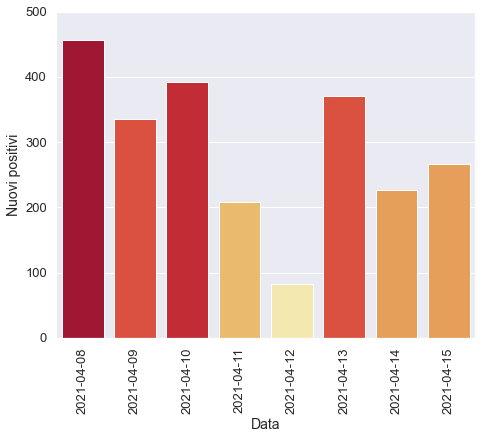

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

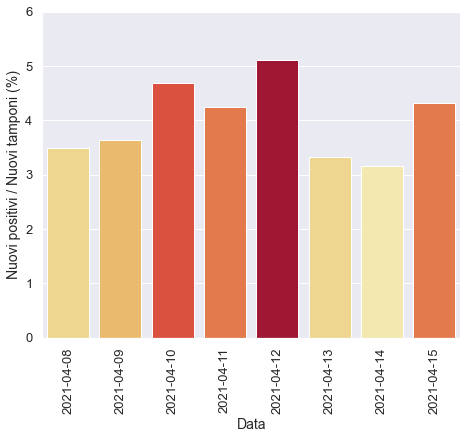

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

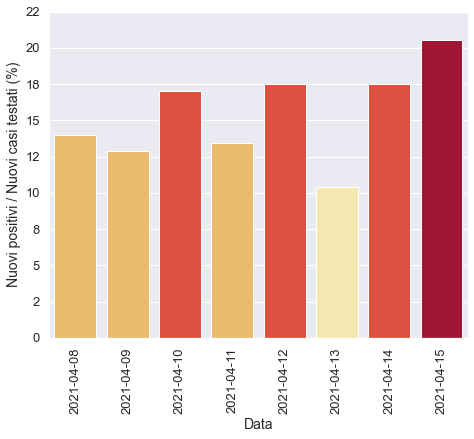

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

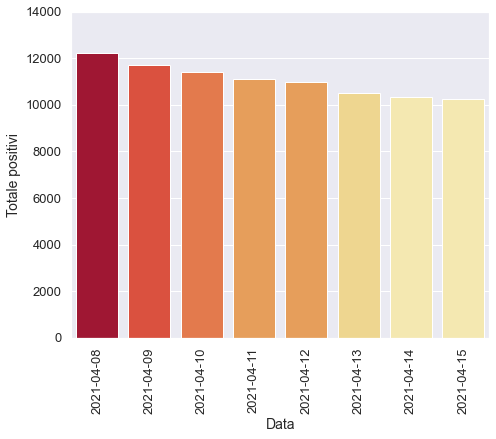

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

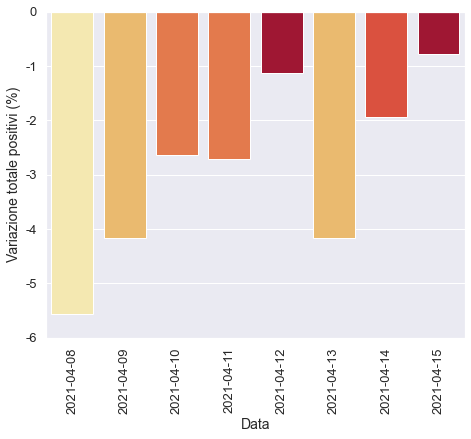

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

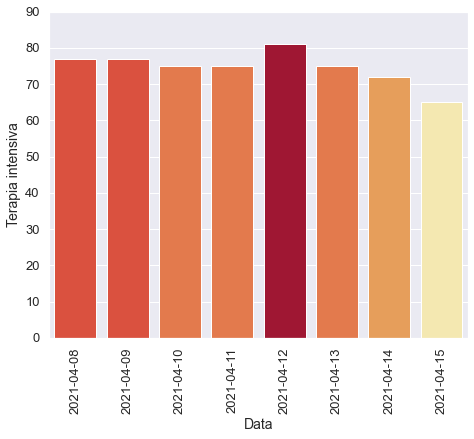

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

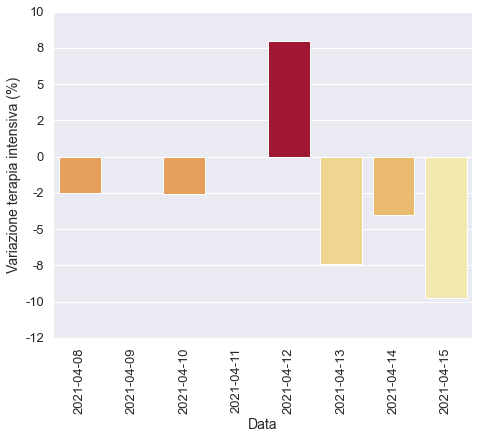

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

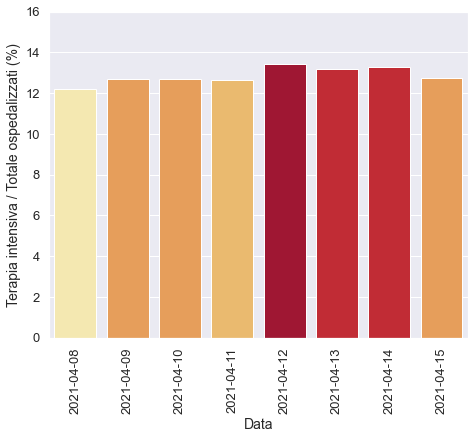

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

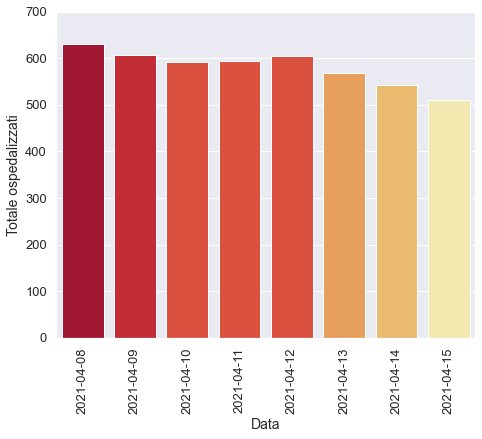

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

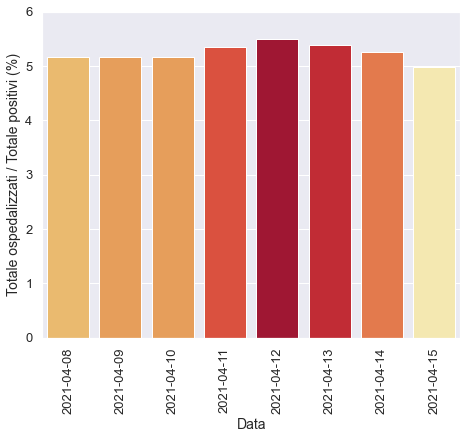

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

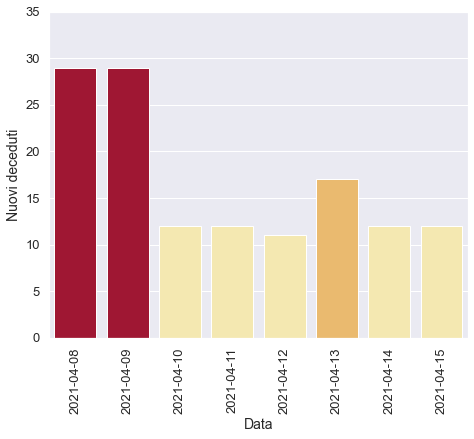

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

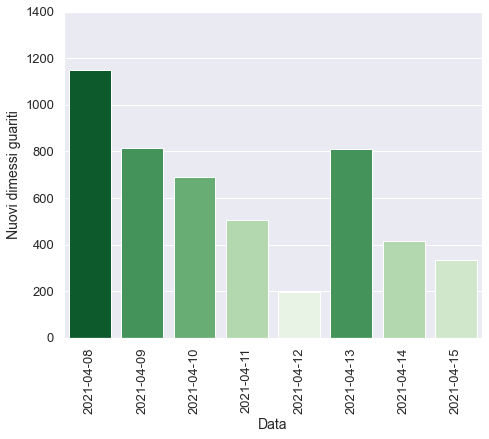

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)